In [20]:
## parameters  key and bpm have a least 20% infulence over the songs streams
# predict key and bpm regargding all the other parameters
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from datetime import date
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.svm import SVR
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("MAIN_DATASET_spotify2023.csv")

data.head()
encoder = LabelEncoder()
data["key"] = encoder.fit_transform(data["key"])
data["mode"] = encoder.fit_transform(data["mode"])
released_day_of_year = []

for i in range(len(data.index)):
    day_of_year = date(data['released_year'][i],
                    data['released_month'][i],
                    data['released_day'][i]).timetuple().tm_yday
    released_day_of_year.append(day_of_year)

# add new series to dataframe
data.insert(len(data.columns), "released_day_of_year", released_day_of_year, True)

data = data[["released_day_of_year", "streams",'bpm','key', 'mode', 'danceability_%', 'valence_%', 'energy_%','acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]

data["streams"] = data["streams"] / 1000000
#data_standarized
data

#without key and bpm
data_sorted = data.sort_values(by = "streams", ascending = False).reset_index(drop=True)
data_sorted

,released_day_of_year,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,333,3703.895074,171,3,0,50,38,80,0,0,9,7
1,6,3562.543890,96,3,1,83,93,65,58,0,9,8
2,312,2887.241814,110,3,0,50,45,41,75,0,11,3
3,130,2864.791672,98,8,1,82,54,59,69,0,18,10
4,282,2808.096550,90,4,0,76,91,50,54,0,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...
947,195,14.780425,140,3,0,56,48,73,0,0,35,4
948,152,11.956641,133,2,1,93,68,65,42,0,12,25
949,194,11.599388,97,11,0,79,92,89,5,0,6,5
950,356,1.365184,105,9,0,82,62,74,10,0,33,7


In [21]:
X = data.drop("streams", axis = 1)
y = data["streams"]

#X_train, X_help, y_train, y_help = train_test_split(X, y, test_size=0.4, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_help, y_help, test_size=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#val_percent = (len(X_val)/(len(data)))*100
test_percent = (len(X_test)/(len(data)))*100
train_percent = (len(X_train)/(len(data)))*100
print(f"Percent of Train: {train_percent:.2f}  and Test dataset:{test_percent:.2f} ")


Percent of Train: 79.94  and Test dataset:20.06 


## Task 1,2

In [22]:
reg = LinearRegression()
weights_train = np.ones_like(y_train)
np.random.seed(42)
random_weights = np.random.rand(len(y_train))

reg.fit(X_train, y_train, sample_weight=weights_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_test)

cv_values = [3,5,10]
for k in cv_values:
    scores = cross_val_score(reg, X_train, y_train, cv=k, scoring='neg_root_mean_squared_error')
    #print(scores)
    mean_cross = scores.mean()
    # chcek if minus is good for rmse without negative
    print(f"mean of {k}-folds cross_validation: {-mean_cross}")

rmse_val = np.sqrt(np.mean((y_pred - y_test)**2))
mean_val = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
mean = mean_squared_error(y_train, y_pred_train)

print(f"\nRmse_val: {rmse_val}, Mean_val:  {mean_val}")
print(f"Rmse: {rmse}, Mean:  {mean}")

mean of 3-folds cross_validation: 584.9942661073587
mean of 5-folds cross_validation: 582.5970252460152
mean of 10-folds cross_validation: 578.9052630703106

Rmse_val: 496.1543157434965, Mean_val:  246169.10503089722
Rmse: 573.08553885526, Mean:  328427.0348450237


##  Task3 neural regresor

In [23]:


reg = MLPRegressor(hidden_layer_sizes=(5, 6, 5), random_state=50, max_iter=50, solver='lbfgs')
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_test)
cv_values = [3,5,10]
for k in cv_values:
    scores = cross_val_score(reg, X_train, y_train, cv=k, scoring='neg_root_mean_squared_error')
    #print(scores)
    mean_cross = scores.mean()
    # chcek if minus is good for rmse without negative
    print(f"mean of {k}-folds cross_validation: {-mean_cross}")
    
rmse_val = np.sqrt(np.mean((y_pred - y_test)**2))
mean_val = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
mean = mean_squared_error(y_train, y_pred_train)
print(f"\nRmse_val: {rmse_val}, Mean_val:  {mean_val}")
print(f"Rmse: {rmse}, Mean:  {mean}")

mean of 3-folds cross_validation: 584.8361028214914
mean of 5-folds cross_validation: 575.5117674900074
mean of 10-folds cross_validation: 566.4983082392245

Rmse_val: 514.0296468369364, Mean_val:  264226.47782730556
Rmse: 558.7459369300199, Mean:  312197.02203580574


## Grid Search

In [24]:
reg = MLPRegressor(hidden_layer_sizes=(5, 5), random_state=50, max_iter=50, solver='lbfgs')

parameters = {'max_iter' : [50,100,150,400,800],'solver':('lbfgs', 'sgd', 'adam'), 'hidden_layer_sizes':[(10, 5, 5), (5, 10, 5), (5, 5, 10),(5,5), (5,10)]}
#parameters = {'solver':('lbfgs', 'sgd', 'adam'),  "random_state" :[50]}
grid_search = GridSearchCV(reg, parameters, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_) # to get the best parameters
print(grid_search.best_estimator_)
print(grid_search.best_score_)# to get the best estimator
#print(grid_search.cv_results_) # to get all results



{'hidden_layer_sizes': (5, 5, 10), 'max_iter': 150, 'solver': 'lbfgs'}
MLPRegressor(hidden_layer_sizes=(5, 5, 10), max_iter=150, random_state=50,
             solver='lbfgs')
-572.8492626086979


## Random Search

In [25]:
logistic = MLPRegressor(hidden_layer_sizes=(5, 5, 10), max_iter=150, random_state=50,
             solver='lbfgs')
distributions = dict(alpha=uniform(loc=0, scale=5), power_t =uniform(loc=0, scale=8))
Random_search = RandomizedSearchCV(logistic, distributions, random_state=0, scoring='neg_root_mean_squared_error')
Random_search.fit(X_train, y_train)
print(Random_search.best_params_) # to get the best parameters
print(Random_search.best_estimator_)
print(Random_search.best_score_)

{'alpha': 3.0138168803582195, 'power_t': 4.359065463975175}
MLPRegressor(alpha=3.0138168803582195, hidden_layer_sizes=5, max_iter=150,
             power_t=4.359065463975175, solver='lbfgs')
-579.5220691054335


In [26]:
reg = MLPRegressor(alpha=11.68863010829902, hidden_layer_sizes=(5, 5, 10),
             max_iter=50, random_state=50, solver='lbfgs')
reg.fit(X_train, y_train)

y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_test)

rmse_val = np.sqrt(np.mean((y_pred - y_test)**2))
mean_val = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
mean = mean_squared_error(y_train, y_pred_train)
print(f"\nRmse_val: {rmse_val}, Mean_val:  {mean_val}")
mae = mean_absolute_error(y_test, y_pred)
print("\nMean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("\nR2:", r2)



Rmse_val: 514.1482537432054, Mean_val:  264348.42682718753

Mean Absolute Error: 377.11464295477646

R2: -0.07988641544262953


## Task 4  Polynomial reggresor

In [27]:
# Create polynomial features
poly_features = PolynomialFeatures(degree = 2)# poziom najlepszy
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.fit_transform(X_test)

reg = LinearRegression()
reg.fit(X_train_poly, y_train)

y_pred_train = reg.predict(X_train_poly)
y_pred = reg.predict(X_val_poly)

rmse_val = np.sqrt(np.mean((y_pred - y_test)**2))
mean_val = mean_squared_error(y_test, y_pred)

cv_values = [3,5,10]
for k in cv_values:
    scores_val_score = cross_val_score(reg, X_train, y_train, cv=k, scoring='neg_root_mean_squared_error')
    #print(scores)
    mean_cross = scores_val_score.mean()
    # chcek if minus is good for rmse without negative
    print(f"mean of {k}-folds cross_validation: {-mean_cross}")

    
scores = cross_validate(reg, X_train, y_train, cv=5,scoring=['r2','neg_mean_absolute_error'])
print(f"\nr2: {scores['test_r2'].mean()}")
print(f"mean_abs_error: {scores['test_neg_mean_absolute_error'].mean()}")
#print(scores['fit_time'])
#print(scores['score_time'])


rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
mean = mean_squared_error(y_train, y_pred_train)

print(f"\nRmse_val: {rmse_val}, Mean_val:  {mean_val}")
print(f"Rmse: {rmse}, Mean:  {mean}")


mean of 3-folds cross_validation: 584.9942661073587
mean of 5-folds cross_validation: 582.5970252460152
mean of 10-folds cross_validation: 578.9052630703106

r2: -0.008666235823097067
mean_abs_error: -426.6661870140626

Rmse_val: 541.3263797398429, Mean_val:  293034.2494022446
Rmse: 549.3389294854476, Mean:  301773.2594482175


## SVM 

In [28]:

# Kernels: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} 
#linear the best but the longest so most complicated

reg = SVR(C=2, epsilon=0.2, kernel='poly', max_iter=50)
reg.fit(X_train, y_train)

y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_test)

rmse_val = np.sqrt(np.mean((y_pred - y_test)**2))
mean_val = mean_squared_error(y_test, y_pred)

cv_values = [3,5,10]
for k in cv_values:
    scores_val_score = cross_val_score(reg, X_train, y_train, cv=k, scoring='neg_root_mean_squared_error')
    #print(scores)
    mean_cross = scores_val_score.mean()
    # chcek if minus is good for rmse without negative
    print(f"mean of {k}-folds cross_validation rmse: {-mean_cross}")

scores = cross_validate(reg, X_train, y_train, cv=5,scoring=['r2','neg_mean_absolute_error'])

print(f"\nr2: {scores['test_r2'].mean()}")
print(f"mean_abs_error: {scores['test_neg_mean_absolute_error'].mean()}")



rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
mean = mean_squared_error(y_train, y_pred_train)

print(f"\nRmse_val: {rmse_val}, Mean_val:  {mean_val}")
print(f"Rmse: {rmse}, Mean:  {mean}")

mae = mean_absolute_error(y_test, y_pred)
print("\nMean Absolute Error:", mae)



mean of 3-folds cross_validation rmse: 604.5484918822654
mean of 5-folds cross_validation rmse: 625.566839161995
mean of 10-folds cross_validation rmse: 638.0284910642238

r2: -0.17409509091080017
mean_abs_error: -531.5771023155182

Rmse_val: 599.073036689792, Mean_val:  358888.5032887289
Rmse: 648.3584370069236, Mean:  420368.662838061

Mean Absolute Error: 536.4694661659049


In [29]:
#GridSearch
reg = SVR( epsilon=0.2)
parameters = {'max_iter' : [50,100,150,400,800],'kernel':('linear', 'poly', 'rbf', 'sigmoid')}
#parameters = {'solver':('lbfgs', 'sgd', 'adam'),  "random_state" :[50]}
grid_search = GridSearchCV(reg, parameters, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_) # to get the best parameters
print(grid_search.best_estimator_)
print(grid_search.best_score_)# to get the best estimator
#print(grid_search.cv_results_) # to get all results


{'kernel': 'sigmoid', 'max_iter': 100}
SVR(epsilon=0.2, kernel='sigmoid', max_iter=100)
-581.9785368065966


In [30]:
#RandomSearch
logistic = SVR(epsilon=0.2, kernel='sigmoid', max_iter=100)

distributions = dict(C=uniform(loc=0, scale=5), gamma = uniform(loc=0, scale=5))
Random_search = RandomizedSearchCV(logistic, distributions, random_state=0, scoring='neg_root_mean_squared_error')
Random_search.fit(X_train, y_train)
print(Random_search.best_params_) # to get the best parameters
print(Random_search.best_estimator_)
print(Random_search.best_score_)

{'C': 2.7440675196366238, 'gamma': 3.5759468318620975}
SVR(C=2.7440675196366238, epsilon=0.2, gamma=3.5759468318620975,
    kernel='sigmoid', max_iter=100)
-582.2922071052292


In [31]:
from sklearn.model_selection import GridSearchCV
X_train, X_help, y_train, y_help = train_test_split(X, y, test_size=0.2, random_state=42)

## SVM model with best  parameters

In [32]:
reg = SVR(C=2, epsilon=0.2, kernel='poly', max_iter=50)
reg.fit(X_train, y_train)

y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_test)


rmse_val = np.sqrt(np.mean((y_pred - y_test)**2))
mean_val = mean_squared_error(y_test, y_pred)

print(f"\nRmse_val: {rmse_val}, Mean_val:  {mean_val}")

mae = mean_absolute_error(y_test, y_pred)
print("\nMean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("\nR2:", r2)


Rmse_val: 599.073036689792, Mean_val:  358888.5032887289

Mean Absolute Error: 536.4694661659049

R2: -0.4660908862279498


## Linear Regression

In [33]:
reg = LinearRegression()
weights_train = np.ones_like(y_train)
np.random.seed(42)

reg.fit(X_train, y_train, sample_weight=weights_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_test)

rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mean = mean_squared_error(y_test, y_pred)
print(f"Rmse val: {rmse}, Mean squared error val:  {mean}")

rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
mean = mean_squared_error(y_train, y_pred_train)
print(f"Rmse: {rmse}, Mean squared error train:  {mean}")

mae = mean_absolute_error(y_test, y_pred)
print("\nMean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("\nR2:", r2)

Rmse val: 496.1543157434965, Mean squared error val:  246169.10503089722
Rmse: 573.08553885526, Mean squared error train:  328427.0348450237

Mean Absolute Error: 377.2257781406536

R2: -0.005622297870983006


# Final Assessment of the model

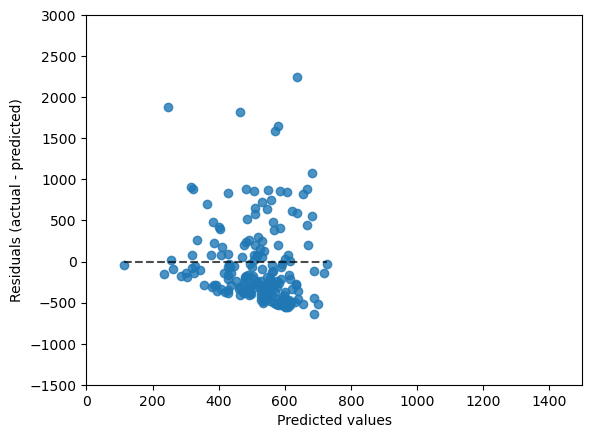

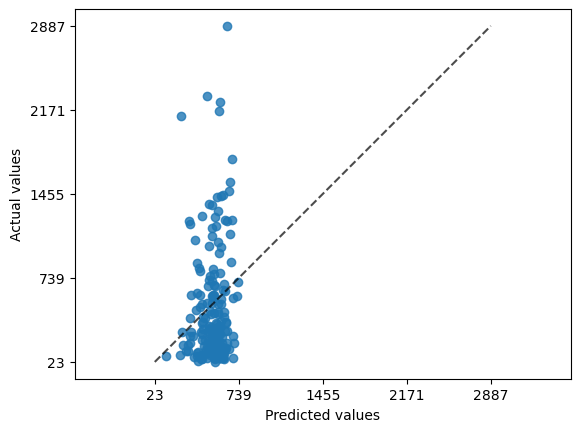

In [35]:
from sklearn.metrics import PredictionErrorDisplay
from sklearn.metrics import confusion_matrix
PredictionErrorDisplay.from_estimator(reg, X_test, y_test,
kind="residual_vs_predicted")
plt.ylim([-1500, 3000])
plt.xlim([0, 1500])
PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=y_pred,
kind="actual_vs_predicted")
